In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
suppressMessages(suppressWarnings(library("DESeq2")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /data/reddylab/Kuei 
WORK DIRECTORY:     /data/reddylab/Kuei/out 
CODE DIRECTORY:     /data/reddylab/Kuei/code 
PATH OF SOURCE:     /data/reddylab/Kuei/source 
PATH OF EXECUTABLE: /data/reddylab/Kuei/bin 
PATH OF ANNOTATION: /data/reddylab/Kuei/annotation 
PATH OF PROJECT:    /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS:    /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 


In [2]:
PREFIX     = "A001_K562_WSTARRseq"
FOLDER     = "coverage_astarrseq_peak_macs_input"
REGIONS    = c("GATA1", "MYC", "FADS")
PREPROCESS = c("raw", "norm")

region  = REGIONS[1]
process = PREPROCESS[1]
fdiry = file.path(FD_RES, "results", PREFIX, FOLDER, "summary")


fname = "result.Log2FC.raw.WGS.tsv"
fpath = file.path(fdiry, fname)
print(fpath)
dat_log2fc_raw = read_tsv(fpath)

fname = "result.Log2FC.deseq.WGS.tsv"
fpath = file.path(fdiry, fname)
print(fpath)
dat_log2fc_deseq = read_tsv(fpath)

[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/A001_K562_WSTARRseq/coverage_astarrseq_peak_macs_input/summary/result.Log2FC.raw.WGS.tsv"


Rows: 246832 Columns: 7
── Column specification ──────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): Chrom, Peak
dbl (5): Start, End, Input, Output, log2FoldChange

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/A001_K562_WSTARRseq/coverage_astarrseq_peak_macs_input/summary/result.Log2FC.deseq.WGS.tsv"


Rows: 246688 Columns: 7
── Column specification ──────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Peak
dbl (6): baseMean, log2FoldChange, lfcSE, stat, pvalue, padj

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
head(dat_log2fc_raw)

Chrom,Start,End,Peak,Input,Output,log2FoldChange
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
chr1,10015,10442,chr1_10015_10442,1.00,NA,NA
chr1,17237,17772,chr1_17237_17772,12.25,22.66667,0.8877905
chr1,136071,137429,chr1_136071_137429,4.50,17.66667,1.9730330
chr1,137737,139544,chr1_137737_139544,36.75,168.66667,2.1983587
chr1,180982,182087,chr1_180982_182087,23.25,73.00000,1.6506657
chr1,183239,184602,chr1_183239_184602,34.25,103.00000,1.5884684


In [4]:
head(dat_log2fc_deseq)

Peak,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1_17237_17772,15.507847,-0.55197423,0.3650312,-1.5121288,0.1305011090,0.376522564
chr1_136071_137429,8.005396,0.42184778,0.5134014,0.8216725,0.4112633282,NA
chr1_137737_139544,68.388785,0.75905245,0.1909129,3.9759105,0.0000701105,0.001384044
chr1_180982_182087,35.093278,0.19192129,0.2417529,0.7938737,0.4272689717,0.696317984
chr1_183239_184602,49.565727,0.08374879,0.2018363,0.4149342,0.6781900855,0.857342193
chr1_186238_187159,50.450003,-0.13877450,0.2161170,-0.6421267,0.5207908905,0.763065578


In [5]:
dat1 = dat_log2fc_raw %>% dplyr::rename(Log2FC_raw = log2FoldChange)
dat2 = dat_log2fc_deseq %>%
    dplyr::select(Peak, log2FoldChange) %>%
    dplyr::rename(Log2FC_deseq = log2FoldChange)
dat = left_join(dat1, dat2, by="Peak")
print(dim(dat))
head(dat)

[1] 246832      8


Chrom,Start,End,Peak,Input,Output,Log2FC_raw,Log2FC_deseq
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,10015,10442,chr1_10015_10442,1.00,NA,NA,NA
chr1,17237,17772,chr1_17237_17772,12.25,22.66667,0.8877905,-0.55197423
chr1,136071,137429,chr1_136071_137429,4.50,17.66667,1.9730330,0.42184778
chr1,137737,139544,chr1_137737_139544,36.75,168.66667,2.1983587,0.75905245
chr1,180982,182087,chr1_180982_182087,23.25,73.00000,1.6506657,0.19192129
chr1,183239,184602,chr1_183239_184602,34.25,103.00000,1.5884684,0.08374879


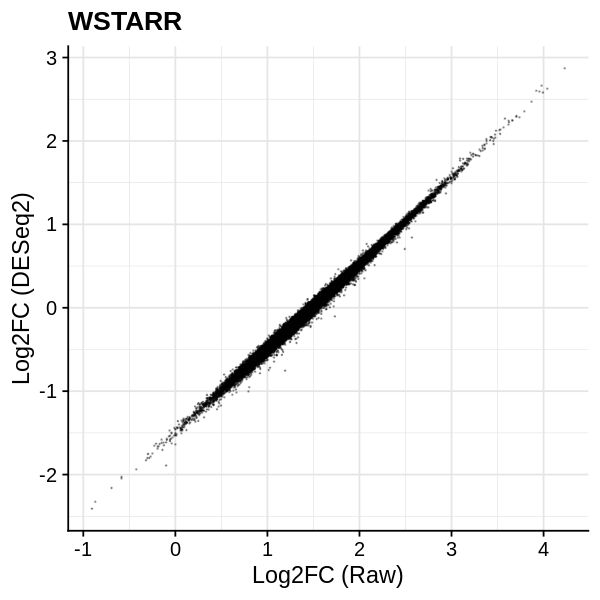

In [6]:
tmp = dat %>% na.omit %>% dplyr::slice_sample(n = 100000)
gpt = ggplot(tmp, aes(x=Log2FC_raw, y=Log2FC_deseq)) +
    geom_point(size=0.1, alpha=0.3) + 
    labs(x="Log2FC (Raw)", y="Log2FC (DESeq2)", title="WSTARR") +
    theme_cowplot() +
    theme(
        panel.grid.major = element_line(colour="grey90", linewidth=0.5),
        panel.grid.minor = element_line(colour="grey90", linewidth=0.2))

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)